## OT mapping estimation for domain adaptation

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot


### Dataset generation

In [2]:
np.random.seed(0) # makes example reproducible

n=100 # nb samples in source and target datasets
theta=2*np.pi/20
nz=0.1
xs,ys=ot.datasets.get_data_classif('gaussrot',n,nz=nz)
xt,yt=ot.datasets.get_data_classif('gaussrot',n,theta=theta,nz=nz)

# one of the target mode changes its variance (no linear mapping)
xt[yt==2]*=3
xt=xt+4


### Plot source and target datasets

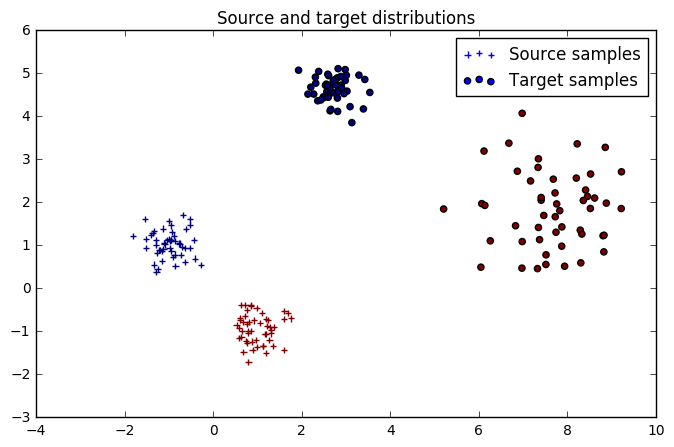

In [3]:
pl.figure(1,(8,5))
pl.clf()

pl.scatter(xs[:,0],xs[:,1],c=ys,marker='+',label='Source samples')
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples')

pl.legend(loc=0)
pl.title('Source and target distributions')
pl.show()

### OT linear mapping estimation

In [4]:

eta=1e-8   # quadratic regularization for regression
mu=1e0     # weight of the OT linear term
bias=True  # estimate a bias

ot_mapping=ot.da.OTDA_mapping_linear()
ot_mapping.fit(xs,xt,mu=mu,eta=eta,bias=bias,numItermax = 20,verbose=True)

xst=ot_mapping.predict(xs) # use the estimated mapping
xst0=ot_mapping.interp()   # use barycentric mapping


It.  |Loss        |Delta loss
--------------------------------
    0|4.009366e+03|0.000000e+00
    1|3.999933e+03|-2.352753e-03
    2|3.999520e+03|-1.031984e-04
    3|3.999362e+03|-3.936391e-05
    4|3.999281e+03|-2.032868e-05
    5|3.999238e+03|-1.083083e-05
    6|3.999229e+03|-2.125291e-06


### OT kernel mapping estimation

In [5]:

eta=1e-5   # quadratic regularization for regression
mu=1e-1     # weight of the OT linear term
bias=True  # estimate a bias
sigma=1    # sigma bandwidth fot gaussian kernel


ot_mapping_kernel=ot.da.OTDA_mapping_kernel()
ot_mapping_kernel.fit(xs,xt,mu=mu,eta=eta,sigma=sigma,bias=bias,numItermax = 20,verbose=True)

xst_kernel=ot_mapping_kernel.predict(xs) # use the estimated mapping
xst0_kernel=ot_mapping_kernel.interp()   # use barycentric mapping

It.  |Loss        |Delta loss
--------------------------------
    0|4.026411e+02|0.000000e+00
    1|3.991051e+02|-8.782091e-03
    2|3.987950e+02|-7.769290e-04
    3|3.986577e+02|-3.442631e-04
    4|3.985741e+02|-2.096899e-04
    5|3.985159e+02|-1.460105e-04
    6|3.984729e+02|-1.078536e-04
    7|3.984436e+02|-7.368218e-05
    8|3.984214e+02|-5.574123e-05
    9|3.984025e+02|-4.740267e-05
   10|3.983871e+02|-3.865975e-05
   11|3.983744e+02|-3.175451e-05
   12|3.983642e+02|-2.561334e-05
   13|3.983558e+02|-2.116042e-05
   14|3.983479e+02|-1.982104e-05
   15|3.983413e+02|-1.643931e-05
   16|3.983351e+02|-1.567880e-05
   17|3.983296e+02|-1.366612e-05
   18|3.983270e+02|-6.571092e-06


### Plotting the mapped samples

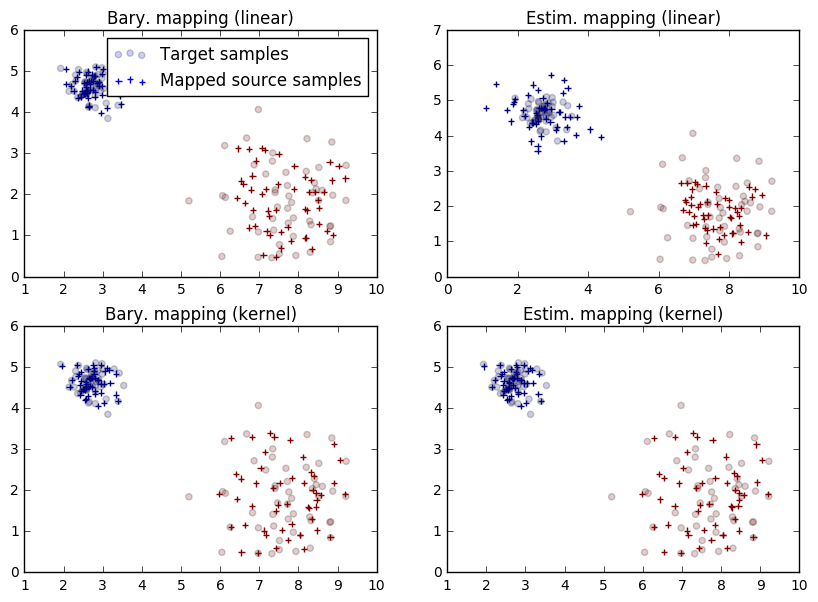

In [6]:

pl.figure(2,(10,7))
pl.clf()
pl.subplot(2,2,1)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=.2)
pl.scatter(xst0[:,0],xst0[:,1],c=ys,marker='+',label='Mapped source samples')
pl.title("Bary. mapping (linear)")
pl.legend(loc=0)

pl.subplot(2,2,2)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=.2)
pl.scatter(xst[:,0],xst[:,1],c=ys,marker='+',label='Learned mapping')
pl.title("Estim. mapping (linear)")

pl.subplot(2,2,3)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=.2)
pl.scatter(xst0_kernel[:,0],xst0_kernel[:,1],c=ys,marker='+',label='barycentric mapping')
pl.title("Bary. mapping (kernel)")

pl.subplot(2,2,4)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=.2)
pl.scatter(xst_kernel[:,0],xst_kernel[:,1],c=ys,marker='+',label='Learned mapping')
pl.title("Estim. mapping (kernel)")

pl.show()

Barycentric mapping on the left, estimated mapping on the right. We can see that the change 
in variance of the mode do not allow for a good linear mapping. In this case the kernel 
mapping (lower right) allows for a far better estimation
